In [11]:
!pip install libfmp

In [7]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Zadanie 1 - demonstracja szumu kwantyzacji
Na poprzednich zajęciach przeprowadzaliśmy kwantyzację na sygnale mowy. Powtórzymy
ten proces dla sygnału muzycznego. Załaduj plik sound1.wav. Następnie odczytaj jego
częstotliwość próbkowania i odtwórz go w notatniku. Dokonaj kwantyzacji tego sygnału z
rozdzielczością bitową równą 8 bit i 6 bit. Odwórz skwantyzowane sygnały. Co można
usłyszeć?

In [12]:
import numpy as np
import scipy as sp
import IPython.display as ipd
from IPython.display import Audio

In [14]:

audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/sound.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)
audio_data_float = audio_data / 2**16

print(f"Częstotliwość próbkowania: {sampling_rate} Hz")

Audio(audio_data, rate=sampling_rate)

Częstotliwość próbkowania: 44100 Hz


In [16]:
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/sound.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)

quantization_bits = 8  # rozdzielczość kwantyzacji

audio_data_8bit = (audio_data_float * 2**quantization_bits).astype(int)  # sygnał skwantyzowany
Audio(audio_data_8bit, rate=sampling_rate)


In [17]:
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/sound.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)

quantization_bits = 6  # rozdzielczość kwantyzacji

audio_data_6bit = (audio_data_float * 2**quantization_bits).astype(int)  # sygnał skwantyzowany
Audio(audio_data_6bit, rate=sampling_rate)


#Zadanie 2 - Obliczanie błędu kwantyzacji
Obliczanie błędu kwantyzacji polega na porównaniu oryginalnego sygnału z jego
zkwantyzowaną wersją, aby określić, jak bardzo różnią się od siebie. Błąd kwantyzacji można
mierzyć na różne sposoby, ale jednym z najczęstszych miar jest błąd średniokwadratowy
(MSE). MSE jest obliczane jako średnia kwadratów różnic między oryginalnym sygnałem a
sygnałem zkwantyzowanym. Oblicz błąd MSE dla sygnałów zkwantyzowanych przy
rozdzielczości kwantyzacji 8 bit i 6 bit

Błąd średniokwadratowy(MSE) sygnału skawntyzowanego 8bit

In [18]:
import numpy as np

# Oblicz różnicę między oryginalnym sygnałem a skwantowanym sygnałem
differences = audio_data_float - audio_data_8bit

# Oblicz kwadraty różnic
squared_differences = differences ** 2

# Oblicz MSE (błąd średniokwadratowy)
mse = round(np.mean(squared_differences), 2)

# Wyświetl wynik
print("Błąd kwantyzacji (MSE):", mse)


Błąd kwantyzacji (MSE): 20.28


Błąd średniokwadratowy (MSE) sygnału skwantyzowanego 8 bit.


In [19]:
import numpy as np

# Oblicz różnicę między oryginalnym sygnałem a skwantyzowanym sygnałem
differences = audio_data_float - audio_data_8bit

# Oblicz kwadraty różnic
squared_differences = differences ** 2

# Oblicz MSE (błąd średniokwadratowy)
mse = round(np.mean(squared_differences), 2)

# Wyświetl wynik
print("Błąd kwantyzacji (MSE):", mse)


Błąd kwantyzacji (MSE): 20.28


# **Zadanie 3 - obliczanie SNR (metoda przybliżona)**
W celu obliczenia stosunku sygnału do szumu SNR (Signal-to-Noise RaYo) związanego z
kwantyzacją, można skorzystać z następującej formuły:
**SNR (dB) = 6.02⋅B + 1.76 dB**
Gdzie:
B - liczba bitów użytych do reprezentacji pojedynczej próbki (rozdzielczość kwantyzacji).
Wynik jest miarą stosunku sygnału do szumu wynikającego z kwantyzacji przy użyciu
rozdzielczości bitowej równej B
Pamiętaj, że to proste przybliżenie i nie uwzględnia rzeczywistych charakterystyk sygnału i
szumu w danych. W rzeczywistości SNR może być również wpływane przez inne czynniki,
takie jak charakterystyka szumu kwantyzacji. Jeśli masz dostęp do danych oryginalnych
sygnału i kwantyzowanego sygnału, możesz dokładniej obliczyć SNR, porównując te dwie
wersje.
**Oblicz SNR metodą przybliżoną dla sygnałow skwantyzowanych w Zadaniu 1 (rozdzielczość
bitowa 8 bit i 6 bit)*

In [20]:
B = 8 # rozdzielczość kwantyzacji
# Oblicz SNR (dB) zgodnie ze wzorem
snr_db = 6.02 * B + 1.76
print(f"SNR (dB) dla {B}-bitowej kwantyzacji: {round(snr_db, 2)} dB")

SNR (dB) dla 8-bitowej kwantyzacji: 49.92 dB


In [21]:
B = 6 # rozdzielczość kwantyzacji
# Oblicz SNR (dB) zgodnie ze wzorem
snr_db = 6.02 * B + 1.76
print(f"SNR (dB) dla {B}-bitowej kwantyzacji: {round(snr_db, 2)} dB")

SNR (dB) dla 6-bitowej kwantyzacji: 37.88 dB


### **Zadanie 4 - obliczanie SNR (metoda dokładna)**
By dokładniej obliczyć SNR (Signal-to-Noise RaYo) porównując dane oryginalne sygnału z
danymi zkwantyzowanymi, możesz postępować w następujący sposób:
1. Oblicz różnicę między danymi oryginalnymi a danymi zkwantyzowanymi, co daje błąd
kwantyzacji.
2. Oblicz moc sygnału jako średnią z kwadratów danych oryginalnych.
3. Oblicz moc szumu jako średnią z kwadratów błędu kwantyzacji.
4. Oblicz SNR w decybelach za pomocą wzoru

**Oblicz SNR metodą dokładną dla sygnałow skwantyzowanych w Zadaniu 1 (rozdzielczość
bitowa 8 bit i 6 bit)** Porównaj otrzymane wyniki do metody przybliżonej

In [22]:
# Oblicz różnicę między danymi oryginalnymi a danymi skwantyzowanymi, co daje błąd kwantyzacji:
quantization_error = audio_data_8bit - audio_data_float

# Oblicz moc sygnału jako średnią z kwadratów danych oryginalnych:
signal_power = np.mean(audio_data_float ** 2)

# Oblicz moc szumu jako średnią z kwadratów błędu kwantyzacji:
noise_power = np.mean(quantization_error ** 2)

# Oblicz SNR w decybelach za pomocą wzoru:
snr_db = np.abs(10 * np.log10(signal_power / noise_power))

# Wyswietlanie wyniku
print(f"SNR (dB): {round(snr_db, 2)}")

SNR (dB): 47.54


In [23]:
# Oblicz różnicę między danymi oryginalnymi a danymi skwantyzowanymi, co daje błąd kwantyzacji:
quantization_error = audio_data_6bit - audio_data_float

# Oblicz moc sygnału jako średnią z kwadratów danych oryginalnych:
signal_power = np.mean(audio_data_float ** 2)

# Oblicz moc szumu jako średnią z kwadratów błędu kwantyzacji:
noise_power = np.mean(quantization_error ** 2)

# Oblicz SNR w decybelach za pomocą wzoru:
snr_db = np.abs(10 * np.log10(signal_power / noise_power))

# Wyswietlanie wyniku
print(f"SNR (dB): {round(snr_db, 2)}")

SNR (dB): 33.75


#Zadanie 5 - porównanie kwantyzacji z i bez Ditheringu**
Przeprowadź jeszcze raz kwantyzację dźwięku z pliku sound1.wav, przy rozdzielczości
kwantyzacji 6 bit. Następnie dokonaj kwantyzacji przy tej samej rozdzielczości kwantyzacji,
ale z użyciem dither (szumu niskopoziomowego). Jakie słyszysz różnice?

In [24]:
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/sound.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)

quantization_bits = 6  # liczba bitów kwantyzacji

audio_data_6bit = (audio_data_float * 2**(quantization_bits)).astype(int)  # sygnał skwantyzowany
Audio(audio_data_6bit, rate=sampling_rate)


In [25]:
import numpy as np

# Wczytaj sygnał dźwiękowy
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/sound.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)
audio_data_float = audio_data / 2**16

# Rozdzielczość kwantyzacji
quantization_bits = 6

# Wygeneruj szum ditheringowy (np. szum równomierny, o małej amplitudzie)
dither = np.random.uniform(-0.4, 0.4, len(audio_data_float)) / (2 ** (quantization_bits - 1))

# Dodaj szum do sygnału przed kwantyzacją
dithered_audio = audio_data_float + dither

# Dokonaj kwantyzacji (zaokrąglenie do odpowiedniej liczby bitów)
quantized_audio = (dithered_audio * 2**quantization_bits).astype(int)

Audio(quantized_audio, rate=sampling_rate)


### **Zadanie 6 - dodawanie Dither z określonym stosunkiem sygnału do szumu (SNR)**
W procesie kwantyzacji przy rozdzielczości kwantyzacji 6 bit uwzględnij dither przy stosunku
sygnału do szumu (SNR) równym 20 dB. Następnie poeksperymentuj z różnymi wartościami
SNR.*italicised text

In [26]:
# Rozdzielczość kwantyzacji
quantization_bits = 6

# Docelowy stosunek sygnału do szumu SNR
target_snr_db = 20

# Obliczanie mocy sygnału jako średniej z kwadratów danych oryginalnych:
sig_avg = np.mean(audio_data_float ** 2)

# Przeliczenie na dB
sig_avg_db = 10 * np.log10(sig_avg)

# Obliczanie poziomu szumu wyjściowego sygnału i przeliczanie na jednostkę mocy (Wat)
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)

# Generowanie szumu białego
mean_noise = 0
dither = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(audio_data_float * 2))

# Łączenie sygnału z szumem
dithered_audio = audio_data_float + dither

# Kwantyzacja
quantized_audio = (dithered_audio * 2**quantization_bits).astype(int)

# Odtwarzanie dźwięku
Audio(quantized_audio, rate=sampling_rate)


### **Zadanie 7 - zastosowanie filtra Wienera**
Na zaszumionym sygnale, będącym wynikiem kwantyzacji z Zadania 5, dokonaj filtracji
szumu filtrem Wienera. Uwzględnij parametr okna analizy filtru Wienera oraz moc szumu.
Parametr okna analizy filtru Wienera może mieć wpływ na skuteczność. Wypróbuj różne
długości okna, aby znaleźć optymalne ustawienie

In [27]:
import numpy as np
from scipy.signal import wiener

# Wczytaj sygnał dźwiękowy bez szumu (w celu obliczenia mocy szumu):
audio_path = '/content/drive/MyDrive/School/AEH/Cyfrowe-przetwarzanie-sygnalow/sound.wav'
sampling_rate, audio_data = sp.io.wavfile.read(audio_path)
audio_data_float = audio_data / 2**16

# Obliczanie błędu kwantyzacji
quantization_error = quantized_audio - audio_data_float

# Oblicz moc szumu jako średnią z kwadratów błędów kwantyzacji:
noise_power = np.mean(quantization_error ** 2)

# Parametr okna analizy filtru Wienera
filter_window = 20

# Filtracja dźwięku
filtered_audio = wiener(quantized_audio, mysize=filter_window, noise=noise_power)

# Odtwarzanie dźwięku
Audio(filtered_audio, rate=sampling_rate)


Exception ignored in: <function Wave_write.__del__ at 0x7cb2f831beb0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/wave.py", line 326, in __del__
    self.close()
  File "/usr/lib/python3.10/wave.py", line 444, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.10/wave.py", line 467, in _ensure_header_written
    self._write_header(datasize)
  File "/usr/lib/python3.10/wave.py", line 471, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.
/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1657: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1657: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


#Zadanie 8 - przykład kwantyzacji obrazów**
Wczytaj przykładowy obraz do notatnika. Przeprowadź kwantyzację obrazu. W tym celu
przyjmij liczbę poziomów kwantyzacji 4, oblicz minimalną i maksymalną wartość pikseli w
obrazie. Wyświetl obraz oryginalny i skwantowany.

<ipython-input-28-594be290d7ff>:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face(gray=True)  # Wczytaj przykładowy obraz w odcieniach szarości


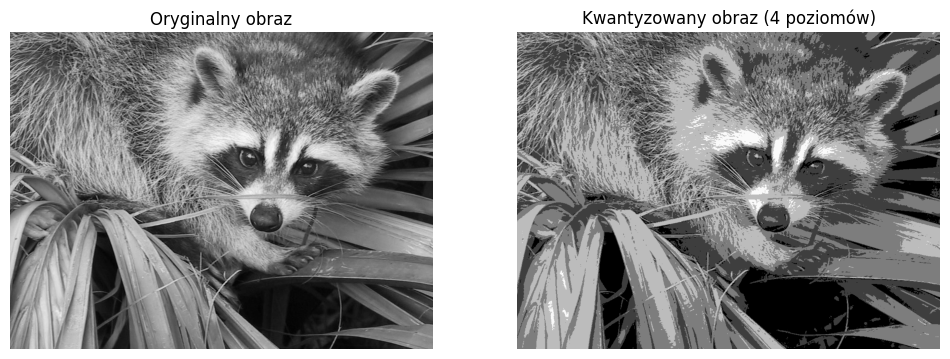

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Wczytaj obraz (przykład z biblioteki SciPy)
from scipy import misc
image = misc.face(gray=True)  # Wczytaj przykładowy obraz w odcieniach szarości

# Parametry kwantyzacji
quantization_levels = 4  # Liczba poziomów kwantyzacji

# Oblicz minimalną i maksymalną wartość pikseli w obrazie
min_value = np.min(image)
max_value = np.max(image)

# Przeprowadź kwantyzację
quantization_step = (max_value - min_value) / quantization_levels
quantized_image = np.round((image - min_value) / quantization_step) * quantization_step + min_value

# Wyświetl obraz oryginalny i kwantyzowany
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Oryginalny obraz')
plt.axis('off')

plt.subplot(122)
plt.imshow(quantized_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'Kwantyzowany obraz ({quantization_levels} poziomów)')
plt.axis('off')

plt.show()


### **Zadanie 9**
Oblicz błąd kwantyzacji MSE dla skawantyzowanego obrazu.

In [29]:
import numpy as np

# Upewnij się, że oba obrazy mają takie same rozmiary
assert image.shape == quantized_image.shape, "Obrazy muszą mieć takie same rozmiary."

# Oblicz różnicę między pikselami obu obrazów
differences = image - quantized_image

# Oblicz kwadraty różnic
squared_differences = differences ** 2

# Oblicz MSE (błąd średniokwadratowy)
mse = round(np.mean(squared_differences), 2)

print("Błąd kwantyzacji (MSE):", mse)

Błąd kwantyzacji (MSE): 326.9


### **Zadanie 10**
Oblicz stosunek sygnału do szumu SNR dla skawantyzowanego obrazu

In [30]:
assert image.shape == quantized_image.shape

# Oblicz sygnał (moc sygnału) i szum (moc szumu)
signal_power = np.sum(image ** 2)
noise_power = np.sum((image - quantized_image) ** 2)

# Oblicz SNR
snr = round(10 * np.log10(signal_power / noise_power), 2)

print("SNR (Signal-to-Noise Ratio):", snr, "dB")


SNR (Signal-to-Noise Ratio): -4.87 dB
